In [1]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-19 05:41:04--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-19 05:41:05--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca06c8e4614e6956946ded7258b.dl.dropboxusercontent.com/cd/0/inline/BndNYdreuqBBa6oe1DasuHl8JHIomh_INVAsU5rJb6AWW1hU3hlCFNP_hN8Hgqn-BMY_W5baY7GSORo_FnvGRrGWx7CWnruc8sul1Mh_rqD-WKwyW6kL6UDfgksN_eDMG86j2dRMn8QuvMA6pmH9XW4hq2PCJFpjymEkkcawWfVarg/file# [following]
--2022-06-19 05:41:05--  https://uca06c8e4614e6956946ded7258b.dl.dropboxusercontent.com/cd/0/inline/BndNYdreuqBBa6oe1DasuHl8JHIomh_INVAsU5rJb6AWW1hU3hlCFNP_hN8Hgqn-BMY_W5baY7GSORo_Fnv

In [2]:
!mkdir data
!unzip HW4.zip -d ./data/

Archive:  HW4.zip
   creating: ./data/edge folder/
  inflating: ./data/edge folder/barbara.bmp  
  inflating: ./data/edge folder/boat.png  
  inflating: ./data/edge folder/cameraman.tif  
  inflating: ./data/edge folder/fruits.png  
  inflating: ./data/edge folder/HappyFish.jpg  
  inflating: ./data/edge folder/house.tif  
  inflating: ./data/edge folder/jetplane.tif  
  inflating: ./data/edge folder/lake.tif  
  inflating: ./data/edge folder/lena.bmp  
  inflating: ./data/edge folder/livingroom.tif  
  inflating: ./data/edge folder/mandril_gray.tif  
  inflating: ./data/edge folder/peppers_gray.tif  
  inflating: ./data/edge folder/pirate.tif  
  inflating: ./data/edge folder/tulips.png  
  inflating: ./data/edge folder/walkbridge.tif  
  inflating: ./data/edge folder/woman_blonde.tif  
  inflating: ./data/edge folder/woman_darkhair.tif  
  inflating: ./data/baby.mp4         
  inflating: ./data/F22.mp4          


In [3]:
!mkdir data/baby
!mkdir data/baby-out
!ffmpeg -i data/baby.mp4 -vf fps=25 data/baby/out%d.png

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [4]:
import cv2
import numpy as np
from glob import glob
from scipy import ndimage
import matplotlib.pyplot as plt

In [14]:
image_paths = sorted(glob('./data/baby/*'))

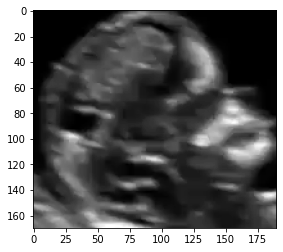

In [15]:
# Create a template of baby head
img = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)
head = img[75:245, 120:310]

plt.imshow(head, cmap='gray')

In [16]:
def match_template(I, T, th=None):
    R = cv2.matchTemplate(I, T, cv2.TM_CCOEFF_NORMED)
    # h, w = I.shape
    # kh, kw = T.shape
    # Tprime = T - T.mean()
    # R = np.zeros((h - kh + 1, w - kw + 1))
    # for i in range(h-kh+1):
    #     for j in range(w-kw+1):
    #         patch = I[i:i+kh, j:j+kw]
    #         patch_prime = patch - patch.mean()
    #         R[i, j] = (patch_prime * Tprime).sum()
    #         R[i, j] /= ((Tprime ** 2).sum() + (patch_prime ** 2).sum()) ** 0.5
    if not th:
        maximum = R.max()
        loc = np.where(R >= maximum)
    else:
        loc = np.where(R >= th)
    return loc

In [17]:
kh, kw = head.shape

for _, ip in enumerate(image_paths[:]):
    img = cv2.imread(ip, cv2.IMREAD_GRAYSCALE)
    index = ip.split('out')[-1]

    img = cv2.GaussianBlur(img, (9, 9), 2)
    loc = match_template(img, head)

    img = cv2.imread(ip, cv2.IMREAD_COLOR)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + kw, pt[1] + kh), (0, 255, 0), 2)
    cv2.imwrite(f'./data/baby-out/out{index}', img)

In [18]:
!ffmpeg -framerate 25 -i ./data/baby-out/out%01d.png baby_head.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li